In [1]:
!wget !wget https://shorturl.at/BLXZ5 -O spam.csv

--2024-01-18 11:47:35--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2024-01-18 11:47:35--  https://shorturl.at/BLXZ5
Resolving shorturl.at (shorturl.at)... 104.26.9.129, 104.26.8.129, 172.67.69.88, ...
Connecting to shorturl.at (shorturl.at)|104.26.9.129|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.shorturl.at/BLXZ5 [following]
--2024-01-18 11:47:35--  https://www.shorturl.at/BLXZ5
Resolving www.shorturl.at (www.shorturl.at)... 172.67.69.88, 104.26.9.129, 104.26.8.129, ...
Connecting to www.shorturl.at (www.shorturl.at)|172.67.69.88|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv [following]
--2024-01-18 11:47:35--  https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv
Resolving raw.githubusercontent.com (raw.gi

In [2]:
import pandas as pd
df = pd.read_csv('/content/spam.csv')
df.head(3)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


## 1. Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
# Renaming the cols
df.rename(columns={'Category':'Target'},inplace=True)

In [14]:
df.sample(3)

,Target,Message
4151,ham,I only work from mon to thurs but Sat i cant l...
5344,ham,When you guys planning on coming over?
1833,ham,What time is ur flight tmr?


In [15]:
# To convert categorical data into numerical by using labelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
df['Target'] = encoder.fit_transform(df['Target'])
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# missing values
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [20]:
# check for duplicate values
df.duplicated().sum()

415

In [21]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

0

##2. EDA

In [23]:
df['Target'].value_counts()

0    4516
1     641
Name: Target, dtype: int64

In [24]:
X = df.Message
y = df.Target

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer


In [27]:
pipeline = make_pipeline(CountVectorizer(),MultinomialNB())

In [28]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [29]:
y_pred = pipeline.predict(X_test)

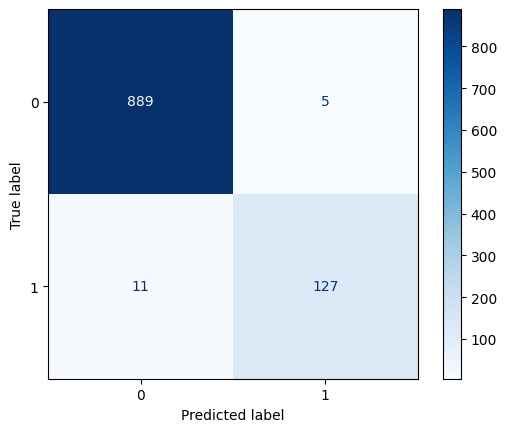

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(pipeline,X_test,y_test,cmap='Blues')

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9829596412556054

In [31]:
import pickle
with open('Spam_classifire.pickle','wb') as file:
  pickle.dump(pipeline,file)